In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical




In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data("labels_eggs-checker.csv")

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [6]:
#processing data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Build model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# latih model dan evaluasi model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')



Epoch 1/5


938/938 [==============================] - 59s 56ms/step - loss: 0.1871 - accuracy: 0.9420 - val_loss: 0.0625 - val_accuracy: 0.9784
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0321 - val_accuracy: 0.9888
Epoch 3/5
938/938 [==============================] - 67s 72ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 91s 97ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 0.0308 - accuracy: 0.9897
Test accuracy: 0.9897000193595886


In [9]:
# Membuat objek ImageDataGenerator
# Melatih model menggunakan generator
# Membuat generator untuk data pelatihan
# Membuat generator untuk data validasi
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow(train_images, train_labels, batch_size=64)
validation_generator = datagen.flow(test_images, test_labels, batch_size=64)
history = model.fit(train_generator, epochs=5, steps_per_epoch=len(train_images)//64, 
                    validation_data=validation_generator, validation_steps=len(test_images)//64)

Epoch 1/5
937/937 [==============================] - 109s 114ms/step - loss: 1.6226 - accuracy: 0.4256 - val_loss: 0.4169 - val_accuracy: 0.8737
Epoch 2/5
937/937 [==============================] - 110s 117ms/step - loss: 0.3104 - accuracy: 0.9038 - val_loss: 0.1922 - val_accuracy: 0.9426
Epoch 3/5
937/937 [==============================] - 63s 67ms/step - loss: 0.1821 - accuracy: 0.9430 - val_loss: 0.1489 - val_accuracy: 0.9540
Epoch 4/5
937/937 [==============================] - 114s 121ms/step - loss: 0.1402 - accuracy: 0.9559 - val_loss: 0.1071 - val_accuracy: 0.9636
Epoch 5/5
937/937 [==============================] - 135s 144ms/step - loss: 0.1142 - accuracy: 0.9641 - val_loss: 0.0860 - val_accuracy: 0.9715


In [10]:
# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)
# Train the model with TensorBoard callback
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
num_layers = len(model.layers)
total_hidden_nodes = sum(layer.output_shape[1] for layer in model.layers if len(layer.output_shape) > 1)
total_weights = sum(layer.count_params() for layer in model.layers)

Epoch 1/5
938/938 [==============================] - 96s 101ms/step - loss: 1.3619 - accuracy: 0.9575 - val_loss: 0.1457 - val_accuracy: 0.9666
Epoch 2/5
938/938 [==============================] - 151s 161ms/step - loss: 0.1011 - accuracy: 0.9759 - val_loss: 0.0926 - val_accuracy: 0.9774
Epoch 3/5
938/938 [==============================] - 92s 98ms/step - loss: 0.0642 - accuracy: 0.9831 - val_loss: 0.0842 - val_accuracy: 0.9831
Epoch 4/5
938/938 [==============================] - 82s 87ms/step - loss: 0.0488 - accuracy: 0.9868 - val_loss: 0.0734 - val_accuracy: 0.9843
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0659 - val_accuracy: 0.9865


In [11]:
# Print the information
print(f'Number of Hidden Layers: {num_layers}')
print(f'Total Hidden Nodes: {total_hidden_nodes}')
print(f'Total Weights (Parameters): {total_weights}')

Number of Hidden Layers: 8
Total Hidden Nodes: 708
Total Weights (Parameters): 93322


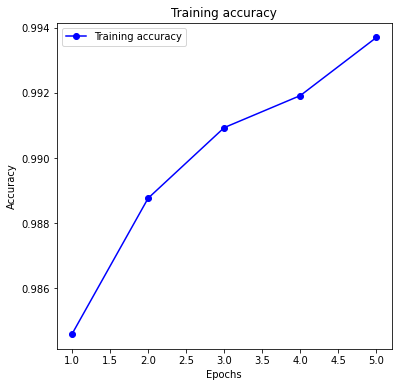

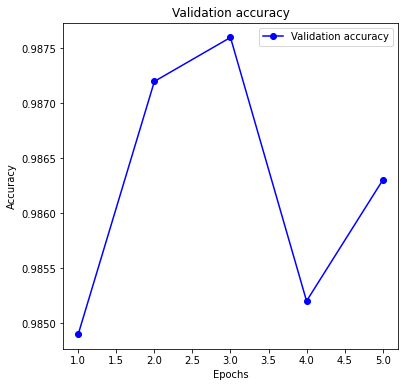

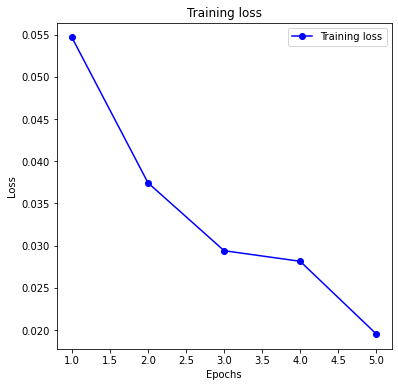

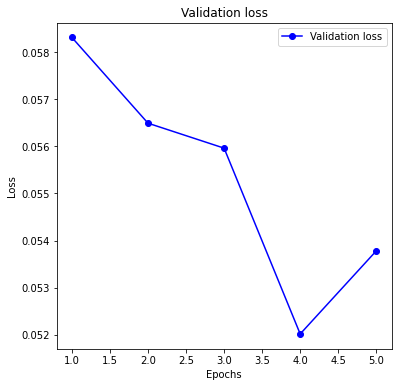

In [17]:
# Retrieve training history from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, val_acc, 'bo-', label='Validation accuracy')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation loss
plt.figure(figsize=(6, 6))
plt.plot(epochs, val_loss, 'bo-', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save model
model.save('mnist_model.h5')


In [14]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 92s 47ms/step - loss: 0.0547 - accuracy: 0.9846 - val_loss: 0.0583 - val_accuracy: 0.9849
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0565 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0560 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0538 - val_accuracy: 0.9863
